<a href="https://colab.research.google.com/github/clovisdanielss/Estudando/blob/master/Python%20Scripts/nn-regression/Boston_Pricing_Dataset_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Intro

 In this notebook we we'll be making a regression to predict the MEDV for an house in Boston. For doing so, we'll use the following dataset.


 Features in order:

|Feature | Description|
|--- |---|
|CRIM|     per capita crime rate by town|
|ZN|       proportion of residential land zoned for lots over 25,000 sq.ft.
|INDUS|    proportion of non-retail business acres per town
|CHAS|     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
|NOX   |   nitric oxides concentration (parts per 10 million)
|RM    |   average number of rooms per dwelling
|AGE   |   proportion of owner-occupied units built prior to 1940
|DIS  |    weighted distances to five Boston employment centres
|RAD |     index of accessibility to radial highways
|TAX|      full-value property-tax rate per \$10,000
|PTRATIO|  pupil-teacher ratio by town
|B|        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
|LSTAT|    % lower status of the population
|MEDV|     Median value of owner-occupied homes in $1000's

In [48]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
tf.random.set_seed(42)

In [49]:
ds = tf.keras.datasets.boston_housing.load_data(test_split=.2)

In [50]:
dstrain, dstest = ds

In [51]:
dstrain_x = pd.DataFrame(dstrain[0], columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ])
dstrain_y = dstrain[1]
dstest_x = pd.DataFrame(dstest[0], columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ])
dstest_y = dstest[1]

In [52]:
pd.concat([dstrain_x, pd.Series(dstrain_y, name="Prices $1000")], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices $1000
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


### Plotting some features

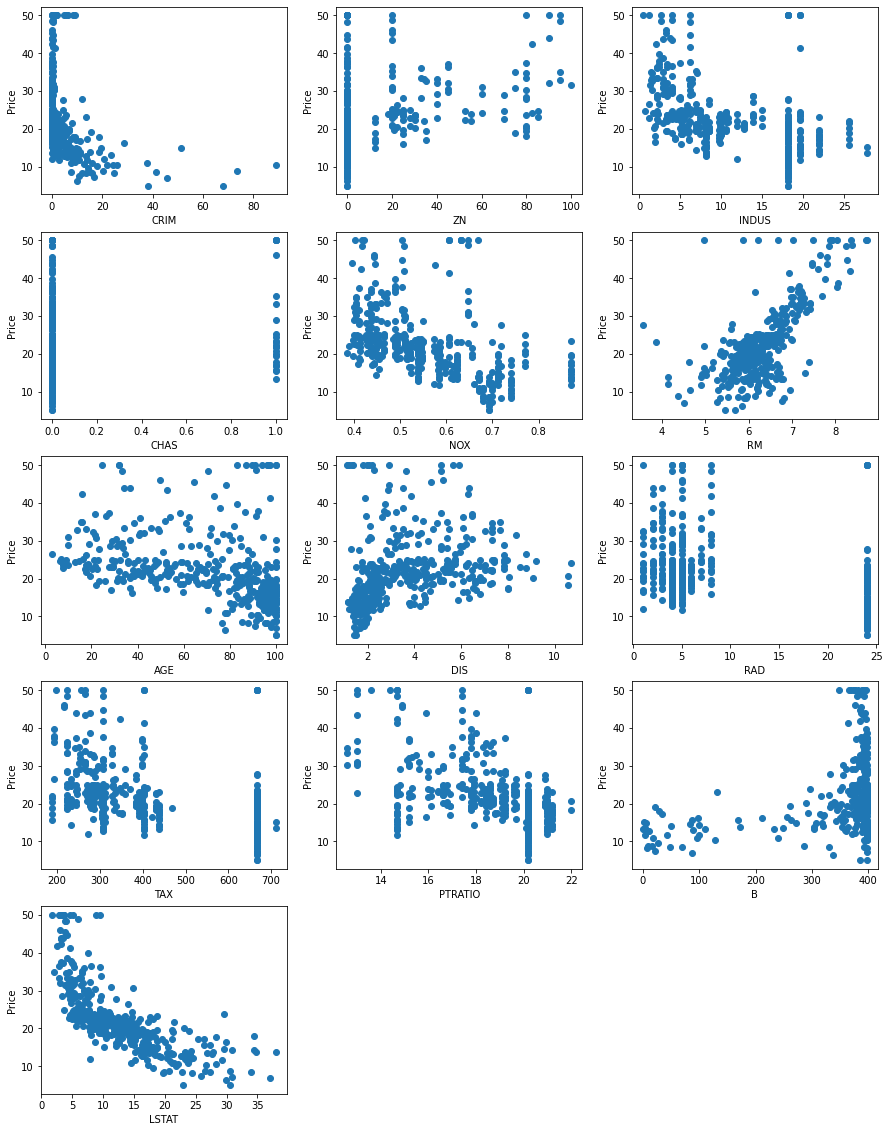

In [53]:
labels = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]

def plot_by_price(name):
  plt.scatter(dstrain_x[name], dstrain_y)
  plt.ylabel("Price")
  plt.xlabel(name)

total_rows=5
plt.figure(figsize=(15,20))
for i in range(len(labels)):
  plt.subplot(total_rows,math.ceil(len(labels)/total_rows),i+1)
  plot_by_price(labels[i])

In [54]:
dstrain_x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

Despite all our dtypes seems to be float64, we got some categorical data as we can see on the plot. We didn't do any data-preparation and we'll use a regression model to see the loss we can get even without data preparation.

#### Testing a Dense Model without data preparation

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[13,]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x.to_numpy(), y=dstrain_y, epochs=100, verbose=False)
log.history["mae"][-1]

3.301499128341675

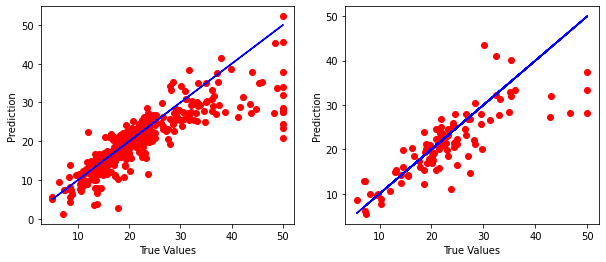

In [56]:
def plot_regression(data, target = dstrain_y):
  pred = model.predict(data)
  plt.scatter(target, pred, c="r")
  plt.plot(target, target, c="b")
  plt.xlabel("True Values")
  plt.ylabel("Prediction")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x, dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x, dstest_y)

In [57]:
model.evaluate(x=dstest_x, y=dstest_y)

4/4 [==============================] - 0s 4ms/step - loss: 3.3032 - mae: 3.7639


[3.3031811714172363, 3.763911485671997]

When we see like that, it seems our model it's pretty good. Afterall we got an error of 3.7, but this error is in thousands, because our y labels are measured in thousands. 

So, our model performs pretty bad.

In [58]:
dstrain_x.nunique()

CRIM       404
ZN          25
INDUS       71
CHAS         2
NOX         79
RM         374
AGE        296
DIS        338
RAD          9
TAX         62
PTRATIO     46
B          286
LSTAT      371
dtype: int64

Looking that way, we could say that only CHAS and RAD are categorical values. 

In [59]:
def to_one_hot(data, col):
  data = pd.concat([data,pd.get_dummies(data[col], prefix=col)], axis=1)
  data = data.drop(col, axis=1)
  return data

dstrain_x = to_one_hot(to_one_hot(dstrain_x, "CHAS"), "RAD")
dstest_x = to_one_hot(to_one_hot(dstest_x, "CHAS"), "RAD")
dstrain_x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1.0,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,1.23247,0.0,8.14,0.5380,6.142,91.7,3.9769,307.0,21.0,396.90,...,0,0,0,0,1,0,0,0,0,0
1,0.02177,82.5,2.03,0.4150,7.610,15.7,6.2700,348.0,14.7,395.38,...,0,0,1,0,0,0,0,0,0,0
2,4.89822,0.0,18.10,0.6310,4.970,100.0,1.3325,666.0,20.2,375.52,...,0,0,0,0,0,0,0,0,0,1
3,0.03961,0.0,5.19,0.5150,6.037,34.5,5.9853,224.0,20.2,396.90,...,0,0,0,0,0,1,0,0,0,0
4,3.69311,0.0,18.10,0.7130,6.376,88.4,2.5671,666.0,20.2,391.43,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.4480,5.602,62.0,6.0877,233.0,17.9,396.90,...,0,0,0,1,0,0,0,0,0,0
400,0.16211,20.0,6.96,0.4640,6.240,16.3,4.4290,223.0,18.6,396.90,...,0,0,0,1,0,0,0,0,0,0
401,0.03466,35.0,6.06,0.4379,6.031,23.3,6.6407,304.0,16.9,362.25,...,0,1,0,0,0,0,0,0,0,0
402,2.14918,0.0,19.58,0.8710,5.709,98.5,1.6232,403.0,14.7,261.95,...,0,0,0,0,0,1,0,0,0,0


Now that we got some categorical variable, we can train our model again.

3.121236562728882


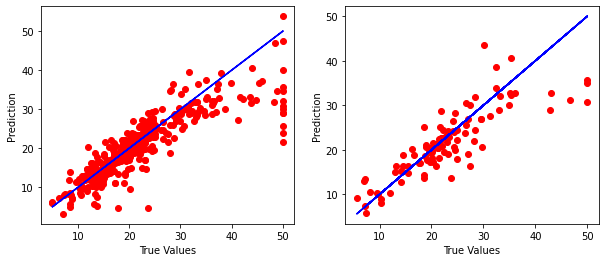

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[22,]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x.to_numpy(), y=dstrain_y, epochs=100, verbose=False)
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x, dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x, dstest_y)

In [61]:
model.evaluate(x=dstest_x, y=dstest_y)

4/4 [==============================] - 0s 3ms/step - loss: 2.9639 - mae: 3.4134


[2.963909149169922, 3.413393497467041]

We didnt get any better. So we'll now try to normalize our data

In [62]:
labels = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]
labels.remove("CHAS")
labels.remove("RAD")
labels

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler.fit(pd.concat([dstrain_x[labels],dstest_x[labels]]))

StandardScaler()

In [64]:
dstrain_x[labels] = scaler.transform(dstrain_x[labels])
dstest_x[labels] = scaler.transform(dstest_x[labels])
dstrain_x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1.0,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,-0.277091,-0.487722,-0.437258,-0.144217,-0.203205,0.822342,0.086449,-0.601276,1.176466,0.441052,...,0,0,0,0,1,0,0,0,0,0
1,-0.417984,3.053142,-1.328764,-1.206732,1.888194,-1.880262,1.176518,-0.357765,-1.736418,0.424386,...,0,0,1,0,0,0,0,0,0,0
2,0.149504,-0.487722,1.015999,0.659147,-1.872905,1.117494,-1.170617,1.530926,0.806576,0.206634,...,0,0,0,0,0,0,0,0,0,1
3,-0.415908,-0.487722,-0.867691,-0.342899,-0.352794,-1.211723,1.041181,-1.094237,0.806576,0.441052,...,0,0,0,0,0,1,0,0,0,0
4,0.009262,-0.487722,1.015999,1.367490,0.130165,0.704992,-0.583726,1.530926,0.806576,0.381077,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.394942,-0.487722,-0.616727,-0.921667,-0.972521,-0.233807,1.089859,-1.040783,-0.256858,0.441052,...,0,0,0,1,0,0,0,0,0,0
400,-0.401652,0.370669,-0.609431,-0.783454,-0.063589,-1.858925,0.301364,-1.100176,0.066796,0.441052,...,0,0,0,1,0,0,0,0,0,0
401,-0.416484,1.014463,-0.740749,-1.008914,-0.361342,-1.610001,1.352738,-0.619094,-0.719220,0.061137,...,0,1,0,0,0,0,0,0,0,0
402,-0.170410,-0.487722,1.231945,2.732346,-0.820083,1.064154,-1.032427,-0.031105,-1.736418,-1.038588,...,0,0,0,0,0,1,0,0,0,0


Now that the data are normalized, we can again try our model. 

1.7800869941711426


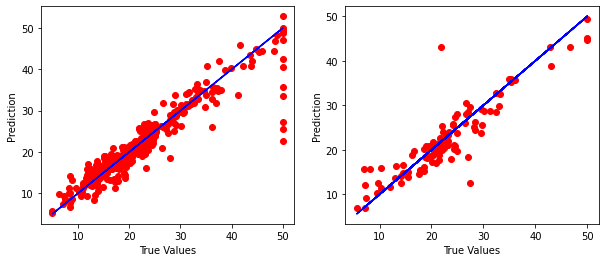

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[22,]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x.to_numpy(), y=dstrain_y, epochs=100, verbose=False)
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x, dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x, dstest_y)

In [66]:
model.evaluate(x=dstest_x, y=dstest_y)

4/4 [==============================] - 0s 3ms/step - loss: 2.0003 - mae: 2.4469


[2.0003204345703125, 2.44691801071167]

In [67]:
labels = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT" ]
one_hotted = ["RAD", "CHAS"]
best_combination = [[], 999]
combinations = [labels] + [labels[i: j] for i in range(len(labels)) 
          for j in range(i + 1, len(labels) + 1) if len(labels[i: j]) > 4]
for combination in combinations:

  for label in one_hotted:
    if label in combination:
      combination.remove(label)
      aux = list(dstrain_x.columns)
      aux = [ele for ele in aux if label in ele]
      combination += aux

  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, activation="relu", input_shape=[len(combination),]),
      tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

  log = model.fit(x=dstrain_x[combination].to_numpy(), y=dstrain_y, epochs=100, verbose=False)
  print(len(combination), combination, log.history["mae"][-1])
  if(log.history["mae"][-1] < best_combination[1]):
    best_combination[0] = combination
    best_combination[1] = log.history["mae"][-1]

22 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RAD_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0', 'CHAS_0.0', 'CHAS_1.0'] 1.8017746210098267
6 ['CRIM', 'ZN', 'INDUS', 'NOX', 'CHAS_0.0', 'CHAS_1.0'] 4.768134593963623
7 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'CHAS_0.0', 'CHAS_1.0'] 2.9299583435058594
8 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'CHAS_0.0', 'CHAS_1.0'] 2.7465083599090576
9 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'CHAS_0.0', 'CHAS_1.0'] 2.6431691646575928
18 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0', 'CHAS_0.0', 'CHAS_1.0'] 2.41338849067688
19 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'RAD_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0', 'CHAS_0.0', 'CHAS_1.0'] 2.311131715774536
20 ['CRIM', 'ZN', 'INDUS', 'NOX

In [68]:
best_combination[0]

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'RAD_1.0',
 'RAD_2.0',
 'RAD_3.0',
 'RAD_4.0',
 'RAD_5.0',
 'RAD_6.0',
 'RAD_7.0',
 'RAD_8.0',
 'RAD_24.0',
 'CHAS_0.0',
 'CHAS_1.0']

1.7429617643356323


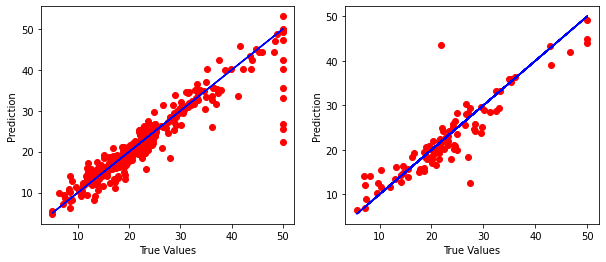

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=100, verbose=False)
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)

In [70]:
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

4/4 [==============================] - 0s 3ms/step - loss: 1.9768 - mae: 2.4202


[1.9767765998840332, 2.4202218055725098]

Now that we have our features prepared, let's tweek our model

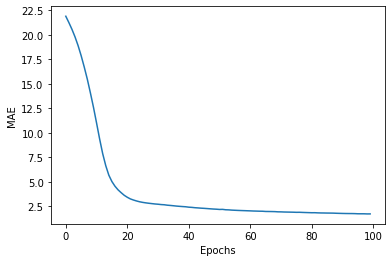

In [71]:
def plot_training():
  plt.plot(range(len(log.history["mae"])),log.history["mae"])
  plt.ylabel("MAE")
  plt.xlabel("Epochs")
plot_training()

0.6895718574523926


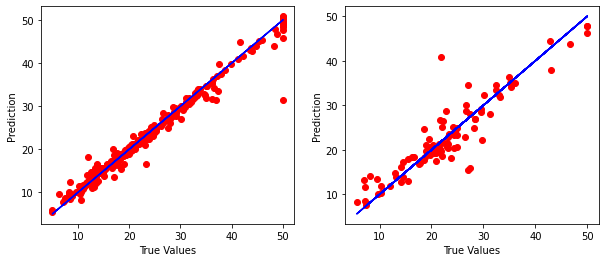

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=300, verbose=False)
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)

In [73]:
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

4/4 [==============================] - 0s 5ms/step - loss: 1.8925 - mae: 2.3312


[1.8924531936645508, 2.3312268257141113]

Now our model is overfitting...

2.693345069885254


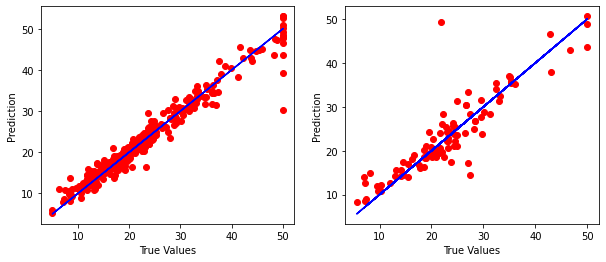

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=300, verbose=False) # Need to train more because of the dropouts. 
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)

In [75]:
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

4/4 [==============================] - 0s 3ms/step - loss: 2.1309 - mae: 2.5930


[2.130945920944214, 2.5930306911468506]

2.113968849182129


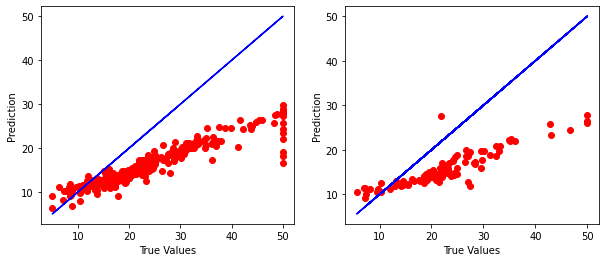

In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=300, verbose=False) # Need to train more because of the dropouts. 
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)

In [77]:
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

4/4 [==============================] - 0s 3ms/step - loss: 7.3375 - mae: 7.8312


[7.337459087371826, 7.831215858459473]

1.9065945148468018
4/4 [==============================] - 0s 4ms/step - loss: 2.0298 - mae: 2.4931


[2.029791831970215, 2.493096113204956]

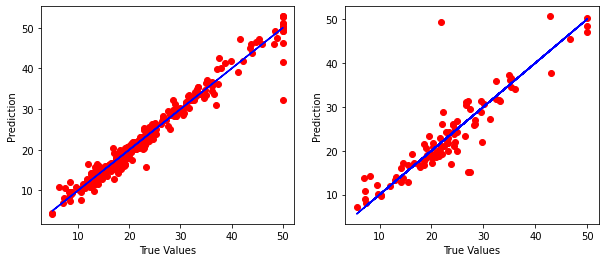

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=300, verbose=False) # Need to train more because of the dropouts. 
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

1.359147310256958
4/4 [==============================] - 0s 3ms/step - loss: 1.9279 - mae: 2.3647


[1.9278775453567505, 2.364686965942383]

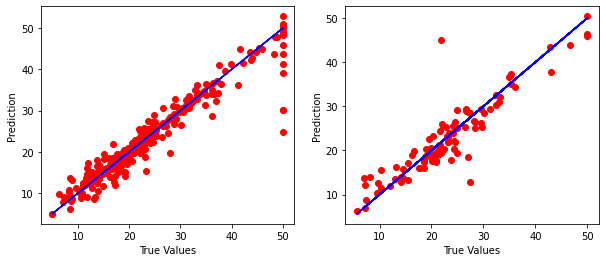

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=[len(best_combination[0]),]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss=tf.keras.losses.Huber(), metrics=["mae"])

log = model.fit(x=dstrain_x[best_combination[0]].to_numpy(), y=dstrain_y, epochs=300, verbose=False) # Need to train more because of the dropouts. 
print(log.history["mae"][-1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_regression(dstrain_x[best_combination[0]], dstrain_y)
plt.subplot(1,2,2)
plot_regression(dstest_x[best_combination[0]], dstest_y)
model.evaluate(x=dstest_x[best_combination[0]], y=dstest_y)

### Conclusion

The best MAE that we got was 2.33 in the validation set, when we overfit the model. In the aproach using dropouts the MAE was of 2.59. 

We tried to use more layers and then our model becomes very bad with an MAE of 7.8.

We tried to increment the number of neurons using dropouts and two layers and our MAE become of 2.49.

But our best solution was with the simpliest model, MAE 2.36

It's important to notice that we reduce a MAE of 3.7 to 2.33 on the validation data.

> **1º Place -** Single Layer Dense Model with 64 neurons. 

> **2º Place -** Double Layer Dense Model with 100 neurons each layer. 

> **3º Place -** Double Layer Dense Model with 256 neurons each layer + dropout.